# Regularized Linear Regression Project Tutorial

In [ ]:
# Loading libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from IPython import get_ipython
from IPython.display import display


In [ ]:
# STEP 1) Connect to the database and convert it to a dataframe
resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(resource_url, delimiter=',')


# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)


# STEP 2) Problem statement:
print("Problem statement: Finding out if there is any relationship between health resources and sociodemographic\n"
"in the US county-level sociodemographic and health resource data (2018-2019). In order to do so, \n"
"we set the target variable 'diabetes_number' to conduct the analysis.")

target_variable = "diabetes_number"
df.head()

Problem statement: Finding out if there is any relationship between health resources and sociodemographic
in the US county-level sociodemographic and health resource data (2018-2019). In order to do so, 
we set the target variable 'anycondition_number' to conduct the analysis.


fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [3]:
for col in df.columns:
    print(col)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [4]:
df.value_counts()

fips   TOT_POP  0-9    0-9 y/o % of total pop  19-Oct  10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  70-79 y/o % of total pop  80+   80+ y/o % of total pop  White-alone pop  % White-alone  Black-alone pop  % Black-alone  Native American/American Indian-alone pop  % NA/AI-alone  Asian-alone pop  % Asian-alone  Hawaiian/Pacific Islander-alone pop  % Hawaiian/PI-alone  Two or more races pop  % Two or more races  POP_ESTIMATE_2018  N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  R_death_2018  R_NATURAL_INC_2018  R_INTERNATIONAL_MIG_2018  R_DOMESTIC_MIG_2018  R_NET_MIG_2018  Less than a high school diploma 2014-18  High school diploma only 2014-18  Some college or associate's degree 2014-18  Bachelor's degree or higher 2014-18  Percent of adults with less than a high school diploma 2014-18  Percent of adults with a high school diploma only 

In [5]:
# STEP 3) First data overiew: data status
df.info()

print(f"\n There are {df.isnull().any().sum()} columns with missing values in the database {', '.join(df.columns[df.isnull().any()])}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB

 There are 0 columns with missing values in the database 


In [6]:
# STEP 5) Overall duplicates control:
print(f"Number of total rows before dropping duplicates: {df.shape[0]}")

#  STEP 5.A) Drop all duplicate occurrences
df.drop_duplicates(keep=False, inplace=True)
print(f"Number of total rows after dropping duplicates: {df.shape[0]}")
print(f"Total number of duplicated rows after dropping duplicates: {len(df[df.duplicated(keep=False)])}")

Number of total rows before dropping duplicates: 3140
Number of total rows after dropping duplicates: 3140
Total number of duplicated rows after dropping duplicates: 0


In [7]:
# STEP 6) First data statistical overiew: Descriptive analysis and first outlier overview

# 6.A) Descriptive analysis observations:

df.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  ...  \
count               3140.000000  3.140000e+03               3140.000000  ...   
mean                  12.283979  1.391649e+04                 11.751535  ...   
std                    3.126297  4.899095e+04                  1.696599  ...   
min                    0.000000  1.100000e+01                  6.092789  ...   
25%                   10.496774  1.232750e+03                 10.689322  ...   
50%                   11.772649  3.000500e+03                 11.580861  ...   
75%                   13.182260  8.314250e+03                 12.639379  ...   
max                   37.570198  1.501844e+06                 22.225129  ...   

         COPD_number  diabetes_prevalence  diabetes_Lower 95% CI  \
count    3140.000000          3140.000000            3140.000000   
mean     5827.242357            13.073503              12.088089   
std     15720.551934             2.724351               2.622948   
min         7.000000             6.100000               5.500000   
25%       815.000000            11.200000              10.300000   
50%      1963.500000            12.800000              11.800000   
75%      4727.000000            14.800000              13.700000   
max    434075.000000            25.600000              24.200000   

       diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
count            3140.000000      3140.000000     3140.000000   
mean               14.053726      9326.577707        3.446242   
std                 2.824828     29754.601185        0.568059   
min                 6.700000        11.000000        1.800000   
25%                12.100000      1187.750000        3.100000   
50%                13.800000      2743.000000        3.400000   
75%                15.900000      6679.250000        3.800000   
max                27.000000    952335.000000        6.200000   

       CKD_Lower 95% CI  CKD_Upper 95% CI     CKD_number  Urban_rural_code  
count       3140.000000       3140.000000    3140.000000       3140.000000  
mean           3.207516          3.710478    2466.234076          4.635350  
std            0.527740          0.613069    7730.422067          1.510447  
min            1.700000          1.900000       3.000000          1.000000  
25%            2.900000          3.300000     314.750000          3.000000  
50%            3.200000          3.700000     718.000000          5.000000  
75%            3.500000          4.100000    1776.250000          6.000000  
max            5.800000          6.600000  237766.000000          6.000000  

[8 rows x 106 columns]

In [8]:
# STEP 6) First data overiew: Descriptive analysis and first outlier overview

# 6.B) First outlier overview

import pandas as pd
import numpy as np

print("This function zooms in all the potential outliers of the database, giving them and specific weight on the database.\n"
"Thus, pointing out if further in-depth analysis of outliers needs to be done on the variables with + 20% of upper and/or lower outliers,\n")
def describe_outliers(df):
    """
    Based on the describe() analysis, this function finds potential outliers in numerical columns
    and explains why they might be outliers, including the number of rows and first the 5 of upper/lower outliers.

    """
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    num_cols = [col for col in num_cols if col]

    for col in num_cols:
        desc = df[col].describe()
        Q1 = desc['25%']
        Q3 = desc['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        upper_outliers = df[df[col] > upper_bound][col].tolist()
        lower_outliers = df[df[col] < lower_bound][col].tolist()

        outliers = upper_outliers + lower_outliers

        if outliers:
            print(f"Column '{col}':")
            print(f"  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'")
            print(f"  - Minimum: {desc['min']}, Maximum: {desc['max']}")
            print(f"  - 25% percentile: {Q1}, 75% percentile: {Q3}")
            print(f"  - Difference (min - 25%): {round(desc['min'] - Q1, 4)}")
            print(f"  - Difference (max - 75%): {round(desc['max'] - Q3, 4)}")
            print(f"  - Potential upper outliers (first 5 or all): {upper_outliers[:5]}")
            print(f"  - Potential lower outliers (first 5 or all): {lower_outliers[:5]}")
            print(f"  - Potential number of upper outliers: {len(upper_outliers)}")
            print(f"  - Proportion of potential upper outliers: {len(upper_outliers) / df.shape[0]:.2%}")
            print(f"  - Potential number of lower outliers: {len(lower_outliers)}")
            print(f"  - Proportion of potential lower outliers: {len(lower_outliers)/df.shape[0]:.2%}\n")
        elif outliers and (len(upper_outliers) / df.shape[0]) > 0.2 or (len(lower_outliers)/df.shape[0]) < (-0.2):
            print("There are no remarkable potential outliers (above 20% of the sample) in this dataset")
        else:
            print("There are no potential outliers in this dataset")
describe_outliers(df)



This function zooms in all the potential outliers of the database, giving them and specific weight on the database.
Thus, pointing out if further in-depth analysis of outliers needs to be done on the variables with + 20% of upper and/or lower outliers,

There are no potential outliers in this dataset
Column 'TOT_POP':
  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'
  - Minimum: 88.0, Maximum: 10105518.0
  - 25% percentile: 10963.25, 75% percentile: 67913.0
  - Difference (min - 25%): -10875.25
  - Difference (max - 75%): 10037605.0
  - Potential upper outliers (first 5 or all): [218022, 659300, 163941, 366519, 413757]
  - Potential lower outliers (first 5 or all): []
  - Potential number of upper outliers: 432
  - Proportion of potential upper outliers: 13.76%
  - Potential number of lower outliers: 0
  - Proportion of potential lower outliers: 0.00%

Column '0-9':
  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'
  - Minimum: 0.0, Maximum: 1208253.0
 

In [9]:
# STEP 7) Data Understanding:

# 7.A) Univariate Categorical Analysis: categories value count overview

def categorical_value_counts(df):
    """
    Executes value counts for all categorical variables in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        None: Prints the value counts for each categorical variable.
    """
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Value counts for column '{column}':\n{df[column].value_counts()}\n")

categorical_value_counts(df)

Value counts for column 'COUNTY_NAME':
COUNTY_NAME
Washington    31
Jefferson     26
Lincoln       24
Franklin      24
Jackson       24
              ..
Vilas          1
Washburn       1
Waukesha       1
Waupaca        1
Waushara       1
Name: count, Length: 1841, dtype: int64

Value counts for column 'STATE_NAME':
STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64


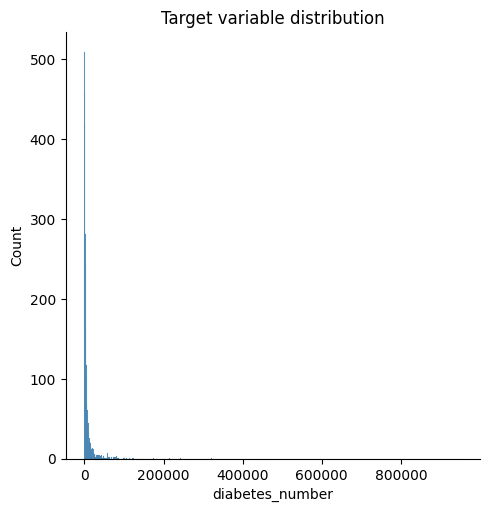


 We can observe here the target variable 'diabetes_number' shows a right-skewed distribution.
This leds to the convenience of applying a standard scaler method further in the process.


In [ ]:
# STEP 4) Target variable distribution:

y = df['diabetes_number']

sns.displot(y)
plt.title("Target variable distribution")
plt.show()



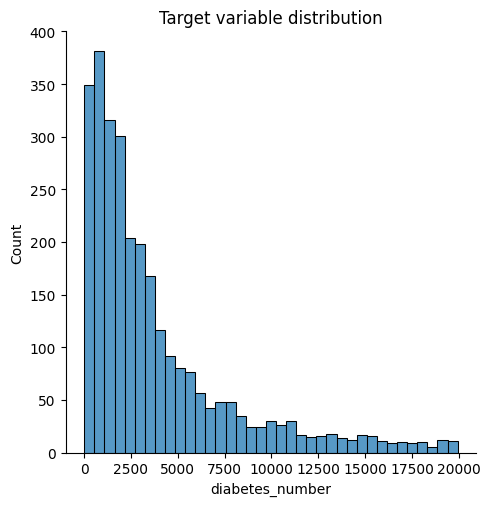


 We can observe here the target variable 'diabetes_number' shows a right-skewed distribution.
This leds to the convenience of applying a standard scaler method further in the process.


In [18]:
# STEP 4.B) Zooming in the target variable distribution:

zoom_y = df[df['diabetes_number'] < 20000]['diabetes_number']
sns.displot(zoom_y)
plt.title("Target variable distribution")
plt.show()

print("\n We can observe here the target variable 'diabetes_number' shows a right-skewed distribution.\n"
"This leds to the convenience of applying a standard scaler method further in the process.")



In [11]:
# STEP 7) Data Scaling using Standard Scaler

# 7.A) Factorizing categorical predictors to asses its correlation with the target variable

import pandas as pd

def factorize_categorical_features(df):
    """
    Identifies categorical features in a DataFrame and creates new columns with factorized values.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with added columns containing factorized values.
    """
    categorical_predictors = df.select_dtypes(include=['object']).columns.tolist()

    for column_name in categorical_predictors:
        # Create a new column name with "_n" suffix
        new_column_name = column_name + "_n"
        # Factorize the values in the specified column and store in the new column
        df[new_column_name] = pd.factorize(df[column_name])[0]

    return df

# Apply the function to your DataFrame
total_data = factorize_categorical_features(df.copy())  # Create a copy to avoid modifying the original df
#total_data ejecuta la función factorize_categorical_features() pero sobre una copia de df no sobre df mismo!!!

# Display the modified DataFrame
total_data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  diabetes_Lower 95% CI  \
0                 12.749771  ...                   11.9   
1                 11.564429  ...                   11.0   
2                 12.865239  ...                   18.6   
3                 13.897321  ...                   13.2   
4                 11.901798  ...                   12.6   

   diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  CKD_Lower 95% CI  \
0                   13.8             5462             3.1               2.9   
1                   13.1            20520             3.2               3.0   
2                   20.6             3870             4.5               4.2   
3                   14.9             2511             3.3               3.1   
4                   14.5             6017             3.4               3.2   

   CKD_Upper 95% CI  CKD_number  Urban_rural_code  COUNTY_NAME_n  STATE_NAME_n  
0               3.3        1326                 3              0             0  
1               3.5        5479                 4              1             0  
2               4.8         887                 6              2             0  
3               3.6         595                 2              3             0  
4               3.7        1507                 2              4             0  

[5 rows x 110 columns]

In [19]:
# STEP 7) Data Scaling using Standard Scaler

# 7.B) Applying the scaler


from sklearn.preprocessing import StandardScaler

data_types = df.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != 'diabetes_number']

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = numeric_columns)
total_data_scal['diabetes_number'] = total_data['diabetes_number']
total_data_scal.head()

fips   TOT_POP       0-9  0-9 y/o % of total pop    19-Oct  \
0 -1.940874 -0.145679 -0.142421                0.158006 -0.135556   
1 -1.940742  0.341296  0.287476               -0.242861  0.320383   
2 -1.940610 -0.237785 -0.239429               -0.419441 -0.246181   
3 -1.940478 -0.245223 -0.246032               -0.426966 -0.254791   
4 -1.940346 -0.138966 -0.135053                0.186249 -0.137140   

   10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39  \
0                  0.573496 -0.153144                  0.027610 -0.139384   
1                 -0.193107  0.183774                 -0.469965  0.230620   
2                 -0.439718 -0.225971                  0.272104 -0.218759   
3                 -0.609076 -0.230792                  0.396168 -0.220555   
4                  0.216679 -0.155888                 -0.200808 -0.143570   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                  0.588469  ...    -0.138900            -0.063696   
1                 -0.110300  ...     0.563986            -0.394103   
2                  0.656538  ...    -0.219763             2.432709   
3                  1.264959  ...    -0.256918             0.376846   
4                  0.088582  ...    -0.074198             0.156575   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  CKD_prevalence  \
0              -0.071720              -0.089834       -0.609615   
1              -0.414900              -0.337677       -0.433549   
2               2.483064               2.317776        1.855312   
3               0.423984               0.299632       -0.257483   
4               0.195197               0.158008       -0.081417   

   CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  Urban_rural_code  \
0         -0.582796         -0.669652   -0.147523         -1.082865   
1         -0.393279         -0.343373    0.389791         -0.420704   
2          1.880929          1.777443   -0.204321          0.903618   
3         -0.203761         -0.180233   -0.242100         -1.745026   
4         -0.014244         -0.017093   -0.124105         -1.745026   

   diabetes_number  
0             5462  
1            20520  
2             3870  
3             2511  
4             6017  

[5 rows x 106 columns]

In [21]:
# STEP 7) Data Understanding:

# 7.E) Viusalizing correlations between the most correlated predictors with the target:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlations_with_target(total_data_scal, target_variable, correlation_threshold):
    """
    Plots scatter plots with regression lines (regplots) and heatmaps for predictors with a correlation
    above a threshold with the target variable. Also prints a table with the selected correlations.

    Args:
        df_correlations_with_target (pd.DataFrame): The DataFrame containing numerical features.
        target_variable (str): The name of the target variable column.
        correlation_threshold (float, optional): The minimum absolute correlation value to be considered. Defaults to 0.1.
    """
    # Calculate correlations with the target variable
    correlations = total_data_scal.corr()[target_variable]

    # Select predictors with correlation above or below the threshold
    selected_predictors = correlations[abs(correlations) > correlation_threshold].drop(target_variable)

    # Print a table of selected correlations
    print(f"\nIn these plots we can start seeing the main correlations of the predictors above/below ±{correlation_threshold} with the target variable {target_variable}.\n"
    "Specifically in this case:\n")
    correlation_table = selected_predictors.sort_values(ascending=False).to_frame()
    correlation_table.columns = [f'Correlation with Target {target_variable}']
    print(correlation_table, "\n")

    # Create subplots grid for regplots and heatmaps
    num_plots = len(selected_predictors)
    num_rows = num_plots  # Each predictor gets one row (regplot + heatmap side by side)
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 10 * num_rows))

    # Handle case where there's only one predictor (axes won't be a 2D array)
    if num_plots == 1:
        axes = [axes]

    # Plot for each selected predictor
    for i, predictor in enumerate(selected_predictors.index):
        # Scatter plot with regression line (regplot)
        sns.regplot(
            ax=axes[i][0],
            data=total_data_scal,
            x=predictor,
            y=target_variable,
            line_kws={"color": "red"}
        )
        axes[i][0].set_title(f"Regplot: {predictor} vs {target_variable}")

        # Heatmap for correlation between the predictor and the target variable
        sns.heatmap(
            total_data_scal[[target_variable, predictor]].corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=False,
            ax=axes[i][1]
        )
        axes[i][1].set_title(f"Heatmap: {predictor} vs {target_variable}")

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


# Example usage
target_variable = 'anycondition_number'
correlation_threshold = 0.9
correlations = total_data_scal.corr()[target_variable].drop(target_variable)

plot_correlations_with_target(total_data_scal, target_variable, correlation_threshold)




In these plots we can start seeing the main correlations of the predictors above/below ±0.9 with the target variable anycondition_number.
Specifically in this case:

                                                    Correlation with Target anycondition_number
Obesity_number                                                                         0.998528
CKD_number                                                                             0.994312
TOT_POP                                                                                0.993514
POP_ESTIMATE_2018                                                                      0.993514
Heart disease_number                                                                   0.993327
diabetes_number                                                                        0.993295
Total Population                                                                       0.992803
county_pop2018_18 and older                                      

In [ ]:
# STEP 9: 


import pandas as pd
from sklearn.model_selection import train_test_split


X = total_data_scal.drop("diabetes_number", axis = 1)
y = total_data_scal["diabetes_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()

fips   TOT_POP       0-9  0-9 y/o % of total pop    19-Oct  \
1292 -0.282189 -0.232556 -0.227731                0.106699 -0.234284   
2302  0.773650 -0.158676 -0.178665               -0.747469 -0.180166   
761  -0.809910 -0.199114 -0.211128               -0.710138 -0.195138   
2194  0.642281 -0.036595 -0.037734                0.124664 -0.017077   
1241 -0.288923  0.090839  0.094680                0.256631  0.101662   

      10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39  \
1292                  0.171904 -0.232951                 -0.418879 -0.226353   
2302                 -0.813690 -0.188266                 -0.724196 -0.175070   
761                   0.469815 -0.166782                  1.322078 -0.195036   
2194                  0.580483 -0.057986                  0.102846 -0.052252   
1241                  0.243136  0.056721                  0.180943  0.042392   

      30-39 y/o % of total pop  ...  COPD_Upper 95% CI  COPD_number  \
1292                 -0.663894  ...           0.980076    -0.223516   
2302                 -0.786006  ...           0.406134    -0.110080   
761                  -0.119547  ...          -0.014757    -0.193106   
2194                  0.350862  ...          -0.435648    -0.007077   
1241                  0.082720  ...           0.214820     0.265603   

      diabetes_prevalence  diabetes_Lower 95% CI  diabetes_Upper 95% CI  \
1292             0.229998               0.195197               0.299632   
2302             0.009727              -0.071720               0.051790   
761             -0.320679              -0.338638              -0.337677   
2194            -0.687797              -0.643687              -0.727143   
1241            -0.210544              -0.147983              -0.231458   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
1292        0.622848          0.554308          0.635465   -0.219329   
2302        0.094650         -0.014244          0.146046   -0.130962   
761        -0.961748         -0.961830         -0.995931   -0.206391   
2194       -0.785681         -0.772313         -0.832792   -0.045054   
1241       -0.081417         -0.014244         -0.180233    0.132454   

      Urban_rural_code  
1292          0.903618  
2302          0.241457  
761          -1.745026  
2194         -1.082865  
1241         -0.420704  

[5 rows x 105 columns]

In [27]:
for col in X_train.columns:
    print(col)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [28]:
# STEP 10) Features Selecttion using f_regression

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression


k = int(len(X_train.columns) * 0.25)
selection_model = SelectKBest(f_regression, k = k)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()




TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
0 -0.232556 -0.227731 -0.234284 -0.232951 -0.226353 -0.231316 -0.229599   
1 -0.158676 -0.178665 -0.180166 -0.188266 -0.175070 -0.161168 -0.134688   
2 -0.199114 -0.211128 -0.195138 -0.166782 -0.195036 -0.194045 -0.199725   
3 -0.036595 -0.037734 -0.017077 -0.057986 -0.052252 -0.033158 -0.020228   
4  0.090839  0.094680  0.101662  0.056721  0.042392  0.068095  0.101699   

      60-69     70-79  White-alone pop  ...  Unemployed_2018  \
0 -0.233425 -0.234680        -0.229069  ...        -0.178637   
1 -0.105618 -0.119270        -0.126439  ...        -0.129283   
2 -0.219256 -0.222207        -0.187194  ...        -0.196284   
3 -0.032603 -0.023876        -0.044020  ...        -0.074907   
4  0.144664  0.140685         0.126315  ...         0.091951   

   Family Medicine/General Practice Primary Care (2019)  Total Population  \
0                                          -0.212643            -0.231195   
1                                          -0.116680            -0.150293   
2                                          -0.192263            -0.197005   
3                                           0.062458            -0.036940   
4                                           0.274818             0.097767   

   Population Aged 60+  county_pop2018_18 and older  anycondition_number  \
0            -0.229737                    -0.233171            -0.234370   
1            -0.098866                    -0.152859            -0.142645   
2            -0.216056                    -0.195125            -0.193205   
3            -0.030034                    -0.039882            -0.003321   
4             0.161314                     0.088485             0.165555   

   Obesity_number  Heart disease_number  COPD_number  CKD_number  
0       -0.232975             -0.225814    -0.223516   -0.219329  
1       -0.155304             -0.115392    -0.110080   -0.130962  
2       -0.201976             -0.216207    -0.193106   -0.206391  
3        0.006163             -0.007276    -0.007077   -0.045054  
4        0.182740              0.197812     0.265603    0.132454  

[5 rows x 26 columns]

In [41]:
# STEP 10.B) Save and load the processed datasets

X_train_sel[target_variable] = list(y_train)
X_test_sel[target_variable] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")


X_train = train_data.drop([target_variable], axis = 1)
y_train = train_data[target_variable]
X_test = test_data.drop([target_variable], axis = 1)
y_test = test_data[target_variable]


In [49]:
# STEP 11) Linear Regression Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


print(f"Intercept (b0): {model.intercept_}")
print(f"Coeficients for all {k} the predictors : {model.coef_}")

# Model prediction
X_test
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = r2_score(y_test, y_pred)
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean square error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {score}")


Intercept (b0): [-0.26249688 -0.26297756 -0.26142223 ... -2.42219691 -2.26174221
 -2.3493203 ]
Coeficients for all 26 the predictors : [[-0.07630274 -0.0715609  -0.07796871 ... -0.11211846 -0.12245168
  -0.08783372]
 [-0.07641244 -0.07216477 -0.07856117 ... -0.11182557 -0.12241977
  -0.08748074]
 [-0.07611764 -0.07153566 -0.07795435 ... -0.11168049 -0.12215717
  -0.08750018]
 ...
 [ 0.20920848  0.14463477  0.10661521 ...  0.12344306  0.25420068
   0.30231831]
 [ 0.25479637  0.54134722  0.37218827 ...  0.19720667  0.02273495
   0.11166422]
 [ 0.24102184  0.136826    0.17482105 ...  0.09676238  0.07339003
   0.3374008 ]]
Mean square error: 58514349.662420385
Root Mean square error: 7649.467279648981
Coefficient of determination: 0.7982248625774775


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# STEP 12) Model Optimization

from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score_2 = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score_2)


print(f"There is a clear an improvement of {score_2-score} observed in the metrics after optimizing the model with Lasso so further optimization methods should be run.")

Coefficients: [  9681.78394902  -3874.78400856  -5330.41976565   2316.2143665
  -6628.21117604  21316.03452458   6394.1489092   -4265.8821513
  -2731.86666266  -5489.41402913  -1147.3818275    3435.99777837
   1361.16451036   6516.30752983 -11145.63146423   -172.77459995
   2456.13800269  -1728.19506771   3203.45031119   5791.74534975
  -6128.64414528   8974.53442906  11723.20459014 -10879.02223303
   6082.71779165]
R2 score: 0.9936547655245154
There is a clear an improvement of 0.19542990294703788 observed in the metrics after optimizing the model with Lasso so further optimization methods should be run.


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.345e+09, tolerance: 2.595e+08
  model = cd_fast.enet_coordinate_descent(


In [37]:
from pickle import dump

dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))